In [12]:
import matplotlib.pyplot as plt
import mrcfile
import numpy as np
import pyfftw
import pyfftw.interfaces.numpy_fft as fft
import seaborn as sns
from pyem import ctf
from pyem import geom
from pyem import vop
from pyem import star
pyfftw.interfaces.cache.enable()
sns.set()
%matplotlib inline

In [4]:
vol_path = "/Users/da/Downloads/cryosparc_P458_J216_005_volume_map.mrc"
vol = mrcfile.open(vol_path, mode='r')

In [7]:
volft = vop.vol_ft(vol.data, pfac=2, threads=8)

In [13]:
rot = geom.euler2rot(*np.deg2rad(np.array([30, 30, 30])))

In [73]:
pp = vop.interpolate_slice_numba(volft, rot, size=256)

In [74]:
proj = fft.fftshift(fft.irfft2(pp))

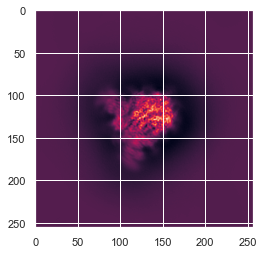

In [75]:
plt.imshow(proj)

In [76]:
rfq = np.fft.rfftfreq(256, 1 / vol.voxel_size['x'])
fq = np.fft.fftfreq(256, 1 / vol.voxel_size['x'])
sx, sy = np.meshgrid(rfq, fq)
s = np.sqrt(sx**2 + sy**2)
a = np.arctan2(sy, sx)

In [77]:
shiftxy = np.exp(-1j * (2 * np.pi * -7 * sx + 2 * np.pi * 12 * sy))

In [78]:
proj_shifted = fft.fftshift(fft.irfft2(pp * shiftxy))

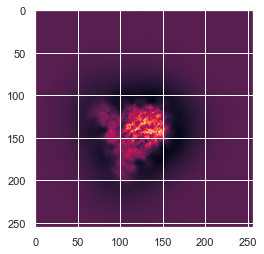

In [79]:
plt.imshow(proj_shifted)

In [80]:
def1 = 15000
def2 = 15500
angast = 30
kv = 300
ac = 0.1
cs = 2.7

In [81]:
c = ctf.eval_ctf(s, a, def1, def2, angast, kv=kv, ac=ac, cs=cs)

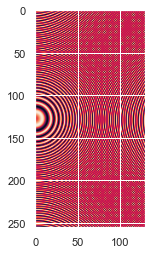

In [82]:
plt.imshow(fft.fftshift(c, axes=0))

In [83]:
proj_ctf = fft.fftshift(fft.irfft2(pp * c))

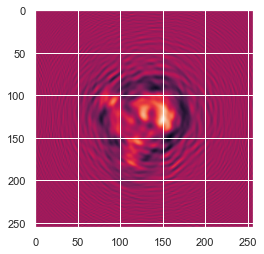

In [84]:
plt.imshow(proj_ctf)